In [45]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sklearn
import sklearn.preprocessing as pp
import sklearn.model_selection as ms
import sklearn.metrics as metrics
import json

In [46]:
df = pd.read_csv('C:\\Users\\msama\\Downloads\\train.csv')
df = df.set_index('Id')

sdf = pd.read_csv('C:\\Users\\msama\\Downloads\\test.csv')
sdf = sdf.set_index('Id')
df.head()


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [47]:
price = df.SalePrice
print("Average sale price: " + "${:,.0f}".format(price.mean()))


Average sale price: $180,921


In [48]:
df = df.drop('SalePrice', axis=1)
all_df = df.append(sdf)
all_df.shape

(2919, 79)

In [49]:
all_features = 'MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition'.split(',')
numeric_features = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','TotalBsmtSF','Fireplaces', 'GarageCars', 'GarageArea','WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']
categorical_features = [f for f in all_features if not(f in numeric_features)]

(len(all_features), len(categorical_features), len(numeric_features))

(79, 53, 26)

In [50]:
numeric_df = all_df[numeric_features]
numeric_df.shape

(2919, 26)

In [51]:
X = numeric_df.as_matrix()

imp = pp.Imputer(missing_values='NaN', strategy='most_frequent', axis=0)
imp = imp.fit(X)
X = imp.transform(X)
X.shape

C:\Users\msama\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
C:\Users\msama\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


(2919, 26)

In [52]:
# Scale - Normalize and center numeric values #StandardScaler removes the mean and scales each feature/variable to unit variance.
scaler = pp.StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
X[0, :]

array([-0.12767816, -0.21787869,  0.52903417,  0.58114542, -0.29302528,
       -0.93416481, -0.10119702,  0.41354722,  1.08733408, -0.24971861,
        0.78136581,  1.23259887,  0.16992709, -0.20769847,  0.98684937,
       -0.44307791, -0.92431121,  0.30641785,  0.34936362, -0.74076041,
        0.20000601, -0.35960075, -0.10333053, -0.28593546, -0.06315017,
       -0.08959196])

In [53]:
def process_categorical(ndf, df, categorical_features):
    for f in categorical_features:
        new_cols = pd.DataFrame(pd.get_dummies(df[f]))
        new_cols.index = df.index
        ndf = pd.merge(ndf, new_cols, how = 'inner', left_index=True, right_index=True)
    return ndf

numeric_df = pd.DataFrame(X)
numeric_df.index = all_df.index
combined_df = process_categorical(numeric_df, all_df, categorical_features)
combined_df.head()

,0_x,1_x,2_x,3_x,4_x,5_x,6_x,7_x,8_x,9_x,...,ConLw,New,Oth,WD,Abnorml,AdjLand,Alloca,Family,Normal,Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,-0.127678,-0.217879,0.529034,0.581145,-0.293025,-0.934165,-0.101197,0.413547,1.087334,-0.249719,...,0,0,0,1,0,0,0,0,1,0
2,0.567125,-0.072044,-0.567016,1.178255,-0.293025,-0.629284,-0.101197,-0.471891,-0.818929,3.822508,...,0,0,0,1,0,0,0,0,1,0
3,0.011283,0.137197,0.338903,0.098189,-0.293025,-0.287999,-0.101197,0.563755,1.087334,-0.249719,...,0,0,0,1,0,0,0,0,1,0
4,-0.359279,-0.078385,-0.567016,-0.494529,-0.293025,-0.046824,-0.101197,0.427382,1.087334,-0.249719,...,0,0,0,1,1,0,0,0,0,0
5,0.752406,0.518903,1.390216,0.469187,-0.293025,-0.160586,-0.101197,1.378042,1.087334,-0.249719,...,0,0,0,1,0,0,0,0,1,0


In [54]:
X = combined_df.as_matrix()
X.shape

C:\Users\msama\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


(2919, 2330)

In [55]:
#PCA
from sklearn.decomposition import PCA

test_n = df.shape[0]

pca = PCA()
pca.fit(X[:test_n,:], price)
X = pca.transform(X)
X.shape

(2919, 1460)

In [56]:
#splitting data
X_train = X[:test_n,:]
X_train, X_val, y_train, y_val = ms.train_test_split(X_train, price, test_size=0.3, random_state=0)
X_test = X[test_n:,:]

(X_train.shape, X_val.shape, X_test.shape)

((1022, 1460), (438, 1460), (1459, 1460))

In [57]:
#linear regression
from sklearn import linear_model

lr = linear_model.LinearRegression()
lr.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [58]:
def print_score(alg, score, params):
    print('%s score is %f with params %s' % (alg, score, json.dumps(params)))

In [59]:
#lasso regression
for a in np.arange(151., 152., 0.1):
    lasso = linear_model.Lasso(alpha=a, max_iter=2000)
    lasso.fit(X_train, y_train)
    print_score('Lasso', lasso.score(X_val, y_val), {'alpha': a})

Lasso score is 0.764262 with params {"alpha": 151.0}
Lasso score is 0.764262 with params {"alpha": 151.1}
Lasso score is 0.764262 with params {"alpha": 151.2}
Lasso score is 0.764263 with params {"alpha": 151.29999999999998}
Lasso score is 0.764263 with params {"alpha": 151.39999999999998}
Lasso score is 0.764263 with params {"alpha": 151.49999999999997}
Lasso score is 0.764263 with params {"alpha": 151.59999999999997}
Lasso score is 0.764264 with params {"alpha": 151.69999999999996}
Lasso score is 0.764264 with params {"alpha": 151.79999999999995}
Lasso score is 0.764264 with params {"alpha": 151.89999999999995}


In [60]:
lasso = linear_model.Lasso(alpha=151.7, max_iter=2000)
lasso.fit(X_train, y_train)

Lasso(alpha=151.7, copy_X=True, fit_intercept=True, max_iter=2000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [61]:
#Ridge Regression
for a in np.arange(25., 26., 0.05):
    ridge = linear_model.Ridge(alpha=a, max_iter=2000)
    ridge.fit(X_train, y_train)
    print_score('Ridge', ridge.score(X_val, y_val), {'alpha': a})

Ridge score is 0.766270 with params {"alpha": 25.0}
Ridge score is 0.766270 with params {"alpha": 25.05}
Ridge score is 0.766271 with params {"alpha": 25.1}
Ridge score is 0.766271 with params {"alpha": 25.150000000000002}
Ridge score is 0.766271 with params {"alpha": 25.200000000000003}
Ridge score is 0.766272 with params {"alpha": 25.250000000000004}
Ridge score is 0.766272 with params {"alpha": 25.300000000000004}
Ridge score is 0.766272 with params {"alpha": 25.350000000000005}
Ridge score is 0.766272 with params {"alpha": 25.400000000000006}
Ridge score is 0.766273 with params {"alpha": 25.450000000000006}
Ridge score is 0.766273 with params {"alpha": 25.500000000000007}
Ridge score is 0.766273 with params {"alpha": 25.550000000000008}
Ridge score is 0.766273 with params {"alpha": 25.60000000000001}
Ridge score is 0.766273 with params {"alpha": 25.65000000000001}
Ridge score is 0.766273 with params {"alpha": 25.70000000000001}
Ridge score is 0.766273 with params {"alpha": 25.75000

In [62]:
ridge = linear_model.Ridge(alpha=25.5, max_iter=2000)
ridge.fit(X_train, y_train)

Ridge(alpha=25.5, copy_X=True, fit_intercept=True, max_iter=2000,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [63]:

print('Ridge score is %f' % ridge.score(X_val, y_val))
print('Lasso score is %f' % lasso.score(X_val, y_val))
print('Linear Regression score is %f' % lr.score(X_val, y_val))

Ridge score is 0.766273
Lasso score is 0.764264
Linear Regression score is 0.449934


In [64]:
from sklearn.metrics import mean_squared_error

y_val_pred = ridge.predict(X_val)
mse = mean_squared_error(y_val, y_val_pred)
print('ridge mean squared error is %s' % \
      '{:,.2f}'.format(mse))



ridge mean squared error is 1,586,772,326.96


In [65]:
def rmsle(y, y_):
    log1 = np.nan_to_num(np.array([np.log(v + 1) for v in y]))
    log2 = np.nan_to_num(np.array([np.log(v + 1) for v in y_]))
    calc = (log1 - log2) ** 2
    return np.sqrt(np.mean(calc))

print("Ridge RMSLE is %f" % rmsle(y_val_pred, y_val))


Ridge RMSLE is 0.149426


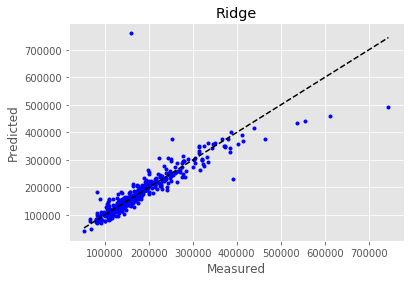

In [66]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

fig, ax = plt.subplots()

ax.plot(y_val, y_val_pred, 'b.')
ax.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--')
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.set_title('Ridge')
plt.savefig("Ridgeregression")
plt.show()

In [67]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()

In [68]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [69]:
preds = dtree.predict(X_test)

In [70]:
preds

array([108000, 212000, 220000, ..., 475000, 140000, 220000], dtype=int64)

In [71]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()

In [72]:
export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)

In [73]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_svg('dtree.svg')
#Image(graph.create_png())

True

In [74]:
x = y_val
z = x.reset_index(drop=True)
p = z.to_numpy(dtype ='int64')
q = preds[:-1021]

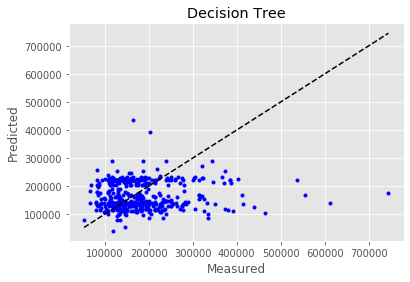

In [75]:
fig, ax = plt.subplots()

ax.plot(p, q, 'b.')
ax.plot([p.min(), p.max()], [p.min(), p.max()], 'k--')
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.set_title('Decision Tree')
plt.savefig("Decisiontree")
plt.show()


In [76]:
#KMeans
from sklearn.cluster import KMeans
km = KMeans(n_clusters=2)

In [77]:
c= numeric_df
km.fit(numeric_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [78]:
km.cluster_centers_

array([[-0.31331537, -0.22969336, -0.33750523, -0.19547991,  0.00959446,
        -0.21803616, -0.00325985, -0.58304753, -0.10041451,  0.02015678,
        -0.51150057, -0.23614198, -0.28902835, -0.0779999 , -0.50195271,
        -0.41549951, -0.38756889, -0.48940113, -0.47607804, -0.24819587,
        -0.27697384,  0.07320618, -0.03437022, -0.06164589, -0.03673209,
        -0.00219233],
       [ 0.43084051,  0.31585173,  0.46410401,  0.26880476, -0.01319335,
         0.29982189,  0.00448262,  0.80174966,  0.13808017, -0.02771763,
         0.70336531,  0.32471924,  0.39744338,  0.1072578 ,  0.69023603,
         0.57135409,  0.53294664,  0.67297633,  0.65465573,  0.34129457,
         0.3808672 , -0.10066595,  0.04726255,  0.08476937,  0.05051035,
         0.00301468]])

In [79]:
km.labels_

array([1, 1, 1, ..., 1, 0, 1])

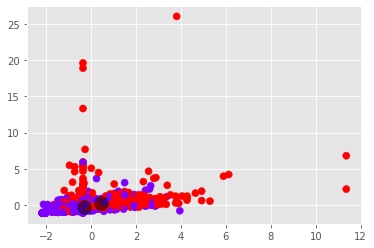

In [80]:
plt.scatter(c.iloc[:, 0], c.iloc[:, 1], c=km.labels_, cmap='rainbow', s=50)
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], c='black', s=200, alpha=0.5)
plt.savefig("clusterflop")

In [81]:
ridge.fit(X[:test_n, :], price)
y_submit = ridge.predict(X_test)
y_submit[y_submit < 0] = 1.
sdf['SalePrice'] = y_submit
sdf.to_csv('submission.csv', columns = ['SalePrice'])

